<a href="https://colab.research.google.com/github/ibonetc/Introduccion_DeepLearning/blob/main/Example_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Red YOLO

https://github.com/ultralytics/ultralytics

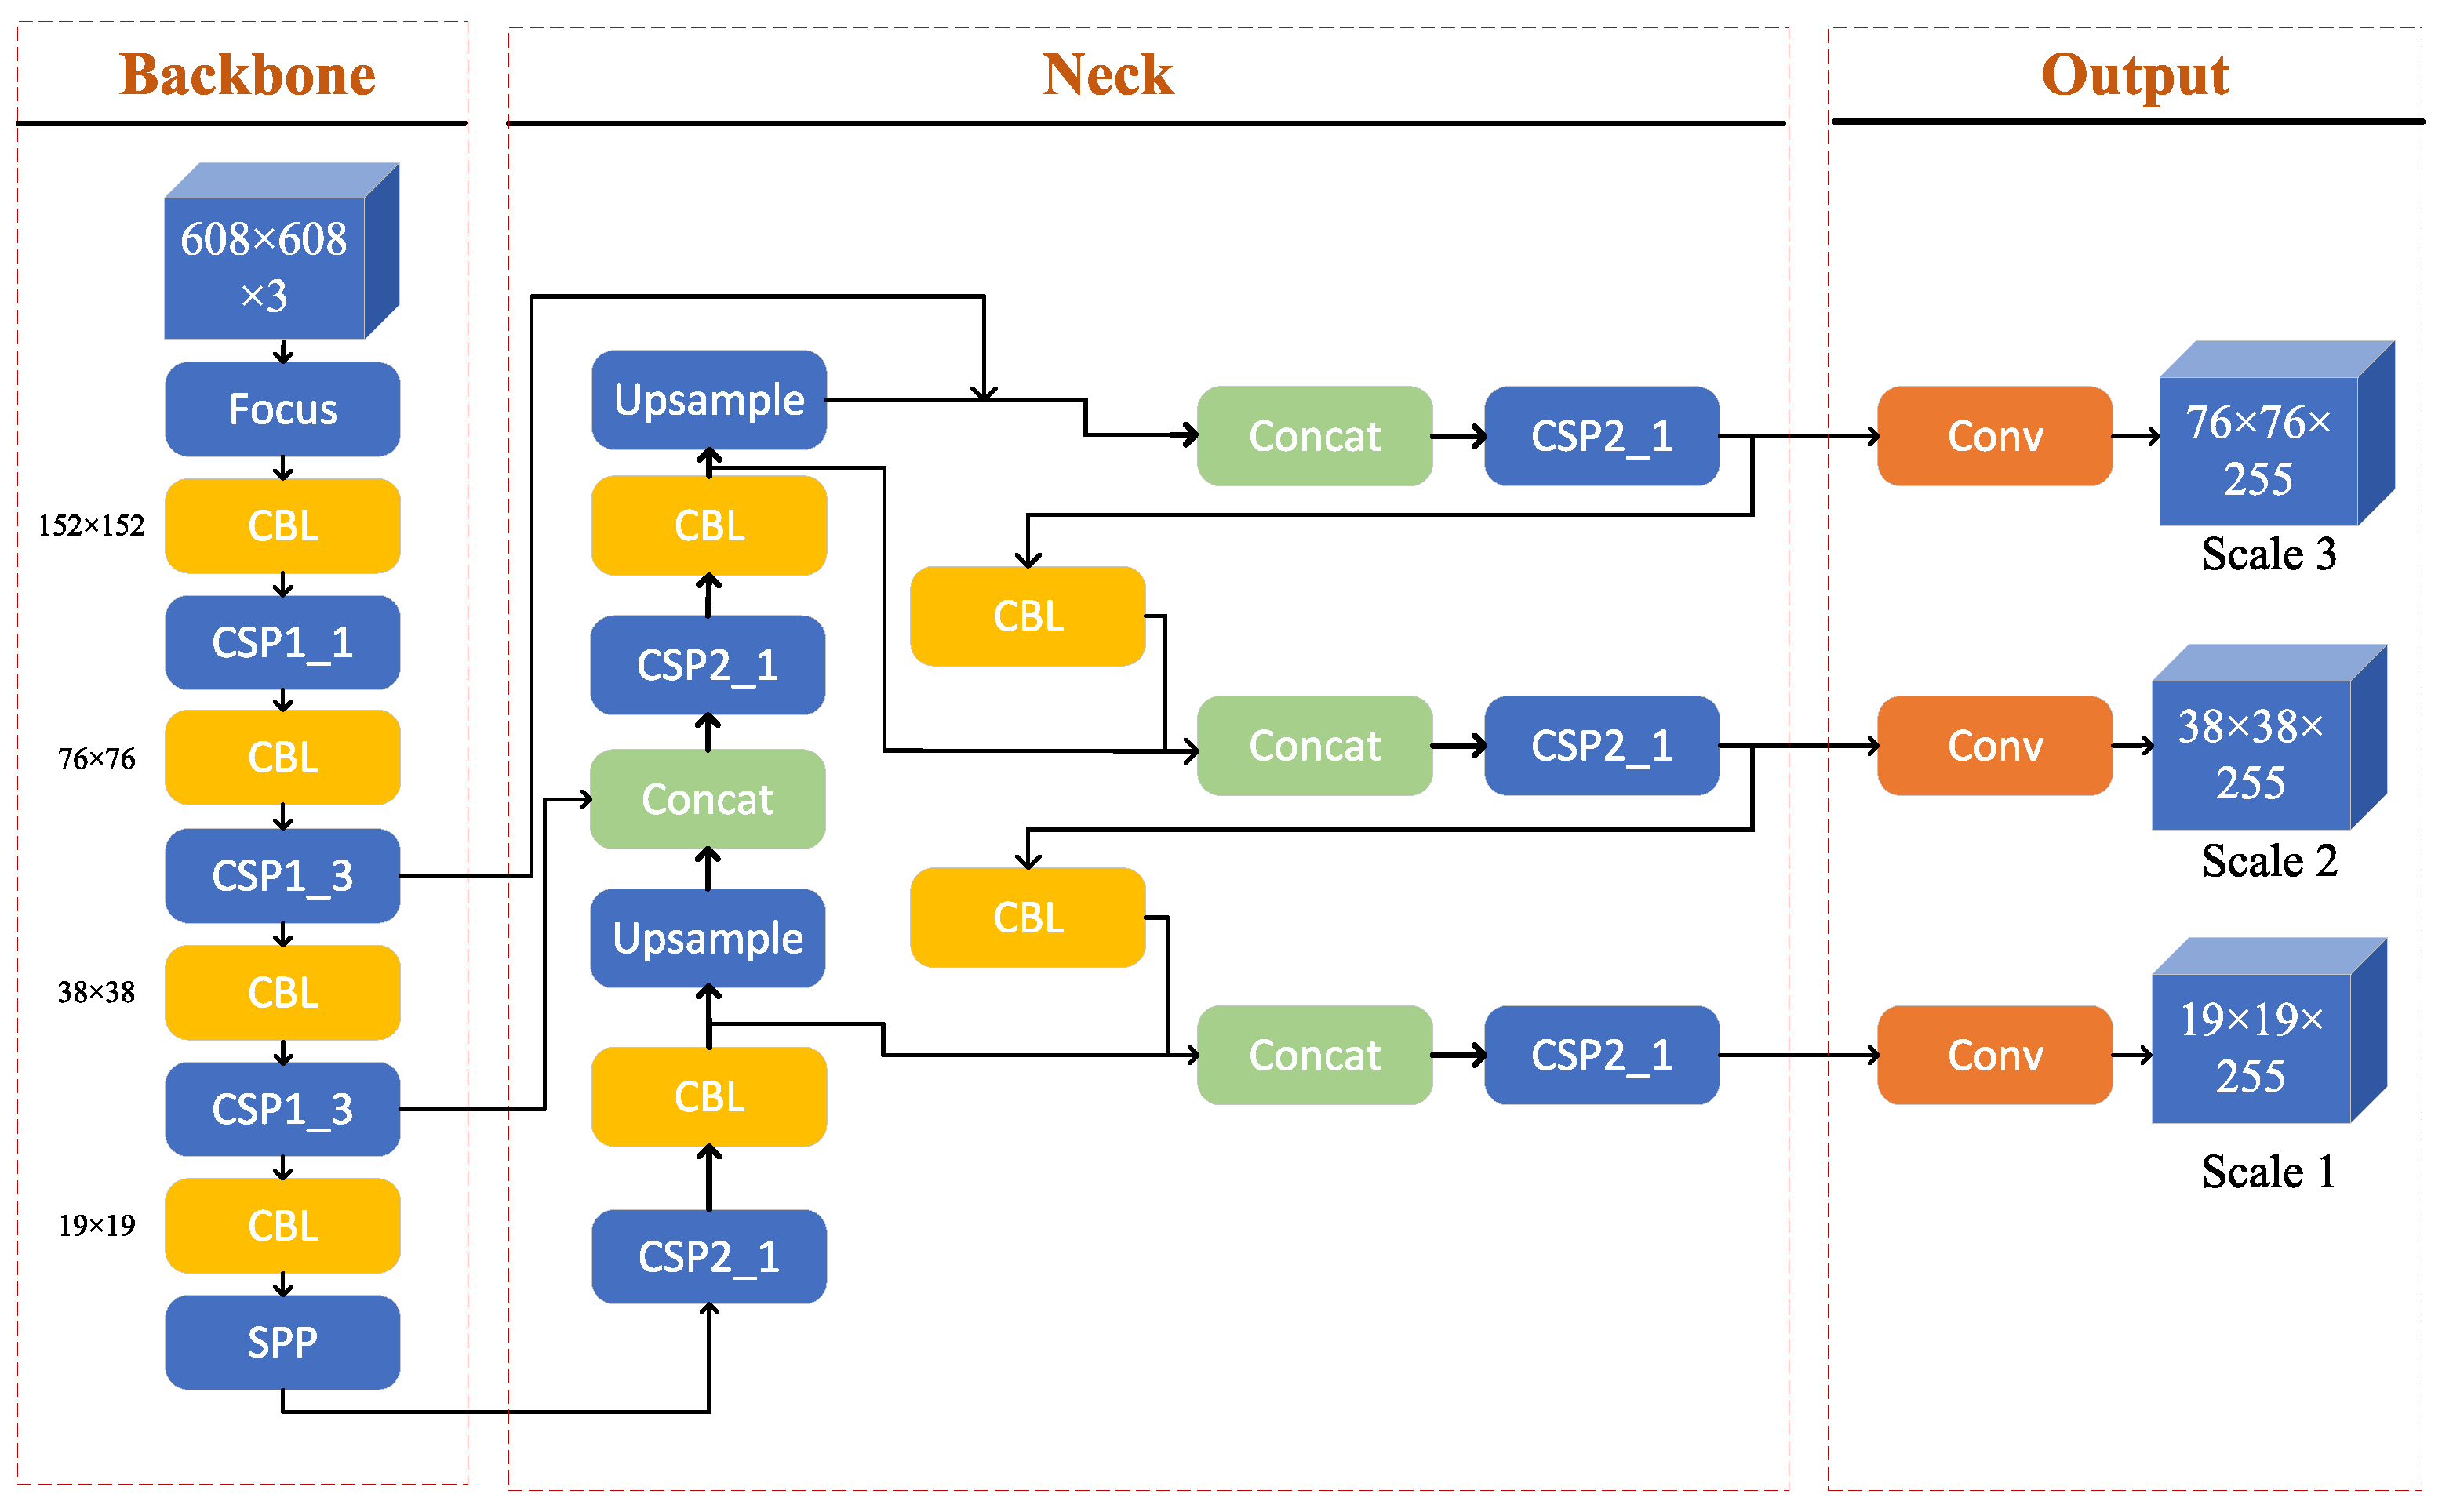

Tomada de: https://www.mdpi.com/2072-4292/13/18/3776/htm

In [ ]:
!nvidia-smi

Thu Aug 31 21:15:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2
from google.colab.patches import cv2_imshow

# Instalar YOLOv8


Para esto vamos a seguir los siguientes pasos:
* Instalar dependencias YOLOv5
* Descargar datos personalizados de detección de objetos YOLOv5
* Escribir nuestra configuración de entrenamiento YOLOv5

**NOTA:** Recuerde elegir GPU en Runtime si aún no está seleccionado.

*Entorno de ejecución --> Cambiar tipo de entorno de ejecución --> Acelerador de hardware --> GPU*)

## Instalar dependencias YOLOv8


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/201.2 GB disk)


In [ ]:
from ultralytics import YOLO
#from IPython.display import display, Image

## Cargar el modelo preentrenado

In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 213MB/s]


YOLO tiene varias tareas:
- Predecir una imagen o video
- Entrenarse utilizando un conjunto de datos
- Validarse en un conjunto de datos
- Track en videos

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## PREDECIR Usando YOLO como está entrenada con COCO

La función detect se puede usar con modelos ya entrenados y los resultados se guardan en *runs/detect*



```
python detect.py --source 0  # webcam (utiliza la cámara)
                          img.jpg  # imagen
                          vid.mp4  # video
                          path/  # directorio de imágenes
                          path/*.jpg  # directorio con extención determinada (hace un glob)
                  --save=True guardar las imágenes con los resultados
                  --save_conf=True guardar imágenes con nivel de confianza
                  --save_txt=True guarda las predicciones como etiquetas
                  --save_crop guardar imágenes cortadas con resultados
                  -- conf nivel de confianza en la predicción
                  -- show mostrar resultados
                  -- show_labels mostrar objetos etiquetados
                  -- boxes mostrar rectángulos en las predicciones
                  -- line_width ancho de la línea de los rectángulos
```

Como resultado se obtiene un generador

In [ ]:
results = model.predict("/content/drive/MyDrive/Fotos_Pruebas/habana.jpg")


image 1/1 /content/drive/MyDrive/Fotos_Pruebas/habana.jpg: 480x640 1 person, 5 cars, 1 motorcycle, 63.1ms
Speed: 14.3ms preprocess, 63.1ms inference, 37.7ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

Diccionario con las clases

In [ ]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
results[0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[2.4470e+03, 1.0923e+03, 3.4890e+03, 3.0217e+03, 9.3783e-01, 0.0000e+00],
        [1.5468e+03, 1.3941e+03, 1.8745e+03, 1.5524e+03, 8.0395e-01, 2.0000e+00],
        [2.3500e+03, 1.4013e+03, 2.5985e+03, 1.5275e+03, 7.9478e-01, 2.0000e+00],
        [8.5297e+02, 1.3829e+03, 1.5351e+03, 1.5770e+03, 7.7326e-01, 2.0000e+00],
        [1.9143e+03, 1.3835e+03, 2.3789e+03, 1.5501e+03, 7.2981e-01, 2.0000e+00],
        [3.5273e+03, 1.4022e+03, 3.8295e+03, 1.5089e+03, 7.1425e-01, 2.0000e+00],
        [1.6214e+02, 1.3854e+03, 4.3336e+02, 1.5780e+03, 7.0423e-01, 3.0000e+00]], device='cuda:0')
cls: tensor([0., 2., 2., 2., 2., 2., 3.], device='cuda:0')
conf: tensor([0.9378, 0.8039, 0.7948, 0.7733, 0.7298, 0.7143, 0.7042], device='cuda:0')
data: tensor([[2.4470e+03, 1.0923e+03, 3.4890e+03, 3.0217e+03, 9.3783e-01, 0.0000e+00],
        [1.5468e+03, 1.3941e+03, 1.8745e+03, 1.5524e+03, 8.0395e-01, 2.0000e+00],
        [2.3500e+03, 1.401

### Mostrar resultados

Ver : https://docs.ultralytics.com/modes/predict/#plotting-results para los parámetros de la función plot

In [ ]:
for r in results:
    im_array = r.plot(line_width=5) # font_size
    im = Image.fromarray(im_array[..., ::-1])  # imagen RGB PIL
    cv2_imshow(im_array)
    im.save('results.jpg')  # guardar image

## Guardando los resultados desde la predicción

In [ ]:
results_2 = model.predict("/content/drive/MyDrive/Fotos_Pruebas/habana.jpg",
                          save=True,show_labels=True, boxes=True, save_crop=True, line_width=5)

WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_boxes' instead.

image 1/1 /content/drive/MyDrive/Fotos_Pruebas/habana.jpg: 480x640 4 persons, 7 cars, 1 motorcycle, 1 bus, 1 truck, 73.3ms
Speed: 14.6ms preprocess, 73.3ms inference, 2952.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


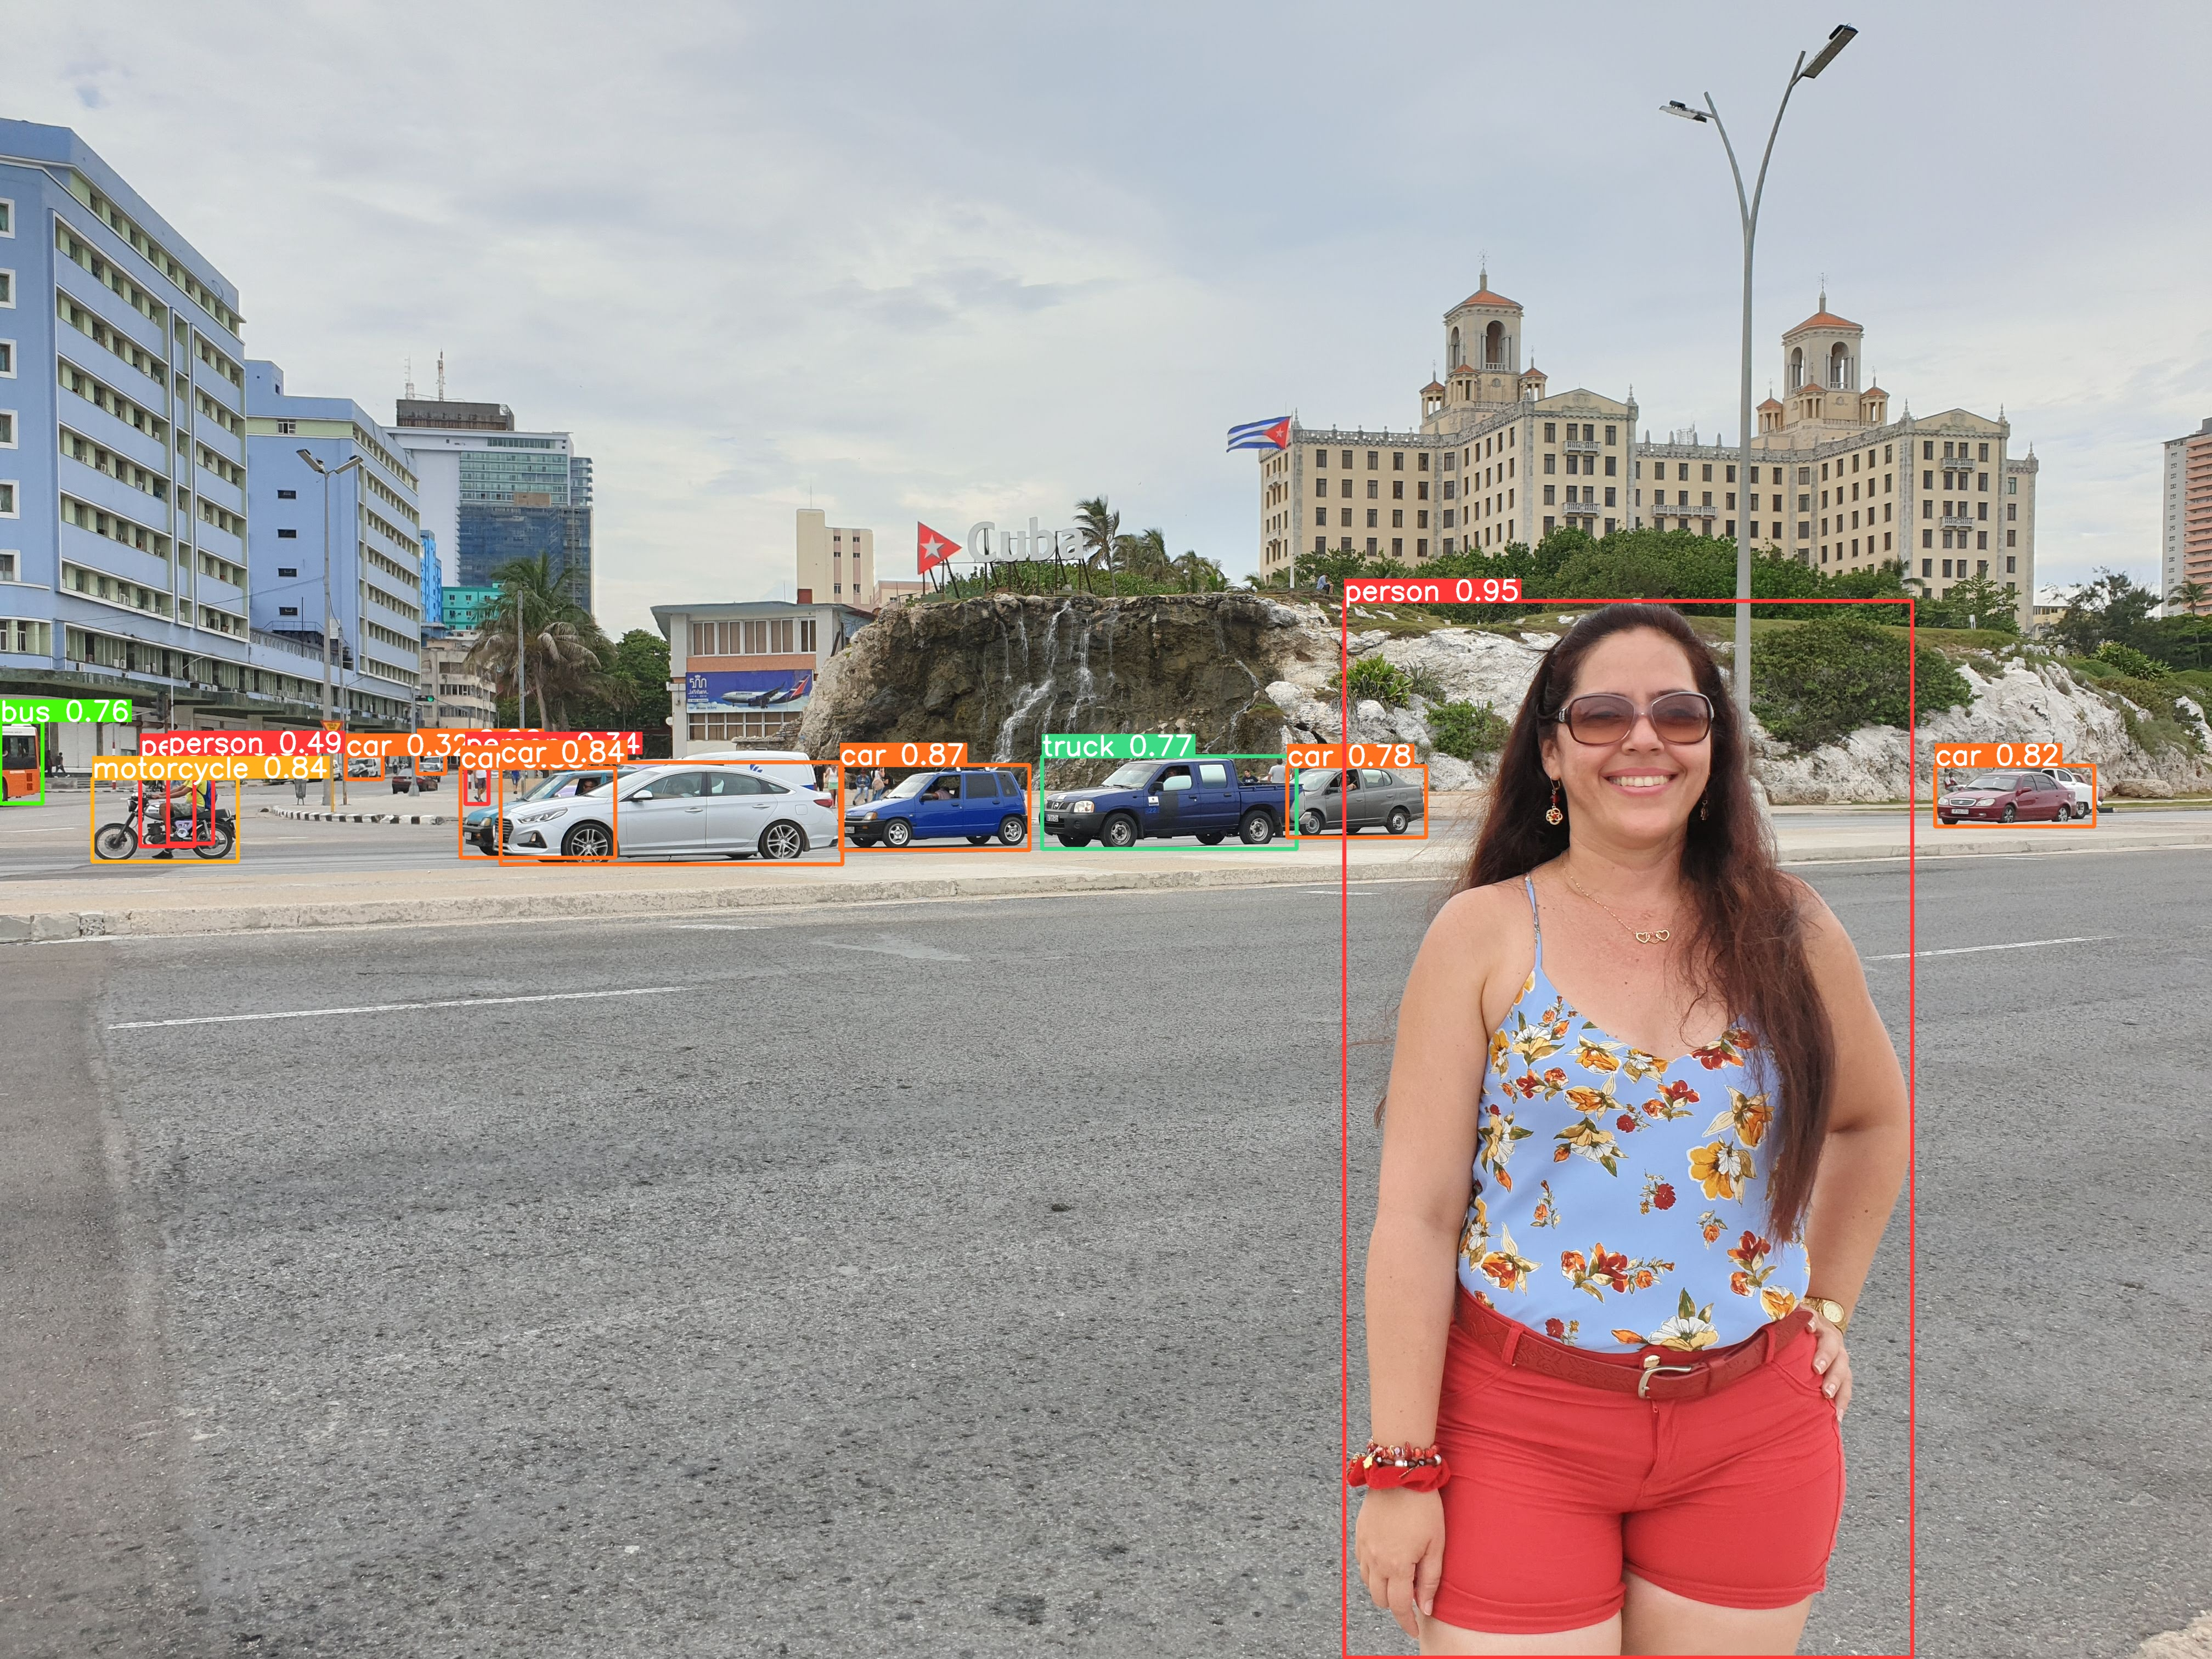

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/predict/habana.jpg', width=500)

## Predecir en video

Descargar un video de ejemplo

In [ ]:
!gdown "https://drive.google.com/uc?id=1hl_NNFciFwImmqplL3RkozpiIa8I38cd&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1hl_NNFciFwImmqplL3RkozpiIa8I38cd&confirm=t
To: /content/demo.mp4
100% 11.5M/11.5M [00:00<00:00, 52.5MB/s]


In [ ]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 275MB/s]


In [ ]:
results_video = model.predict("/content/demo.mp4",save=True,show_labels=True, boxes=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1314) /content/demo.mp4: 384x640 1 truck, 26.2ms
video 1/1 (2/1314) /content/demo.mp4: 384x640 1 truck, 26.2ms
video 1/1 (3/1314) /content/demo.mp4: 384x640 1 truck, 26.3ms
video 1/1 (4/1314) /content/demo.mp4: 384x640 1 truck, 26.1ms
video 1/1 (5/1314) /content/demo.mp4: 384x640 1 truck, 26.2ms
video 1/1 (6/1314) /content/demo.mp4: 384x640 1 truck, 26.1ms
video 1/1 (7/1314) /content/demo.mp4: 384x640 1 truck, 26.1ms
video 1/1 (8/1314) /co

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

In [ ]:
# Video de salida de predicción
save_path = '/content/runs/detect/predict2/demo.avi'

# Comprimir video
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Mostrar video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Track un video

In [ ]:
results = model.track(source="/content/demo.mp4", show=True, tracker="bytetrack.yaml",
                      save=True,show_labels=True, boxes=True)

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.5s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1314) /content/demo.mp4: 384x640 1 truck, 9

In [ ]:
results[0].save_dir

'runs/detect/predict'

In [ ]:
save_path = '/content/runs/detect/predict/demo.avi'

# Comprimir video
compressed_path = "/content/resultTrack.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Mostrar video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)